In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function, absolute_import
import matplotlib.pyplot as plt
import numpy as np

In [13]:
import pydrake
from pydrake.all import (
    AutoDiffXd, Expression, Variable,
    MathematicalProgram, SolverType, SolutionResult,
    DirectCollocationConstraint, AddDirectCollocationConstraint,
    PiecewisePolynomial,
)

# import torch
# import torch.nn as nn
# import torch.nn.functional as F

from traj.dircol import (
    make_real_dircol_mp,
)

from nn_system.NNSystemHelper import (
    FC,
    MLP,
    MLPSMALL,
    make_NN_constraint,
)

##############################
#       SETTINGS
##############################
# kNetConstructor = FC
kNetConstructor = MLPSMALL
# kNetConstructor = MLP
kNumTimesteps = 21
prog, tree = make_real_dircol_mp(expmt="acrobot", seed=1776)

# Make vars for mathematical program to know about neural network
num_params = sum(tensor.nelement() for tensor in kNetConstructor().parameters())
num_inputs = 1
num_states = 4
print("total params: ", sum((num_inputs, num_states, num_params)))
T = prog.NewContinuousVariables(num_params, 'T')

# Apply this NN constraint to all timesteps!
for t in range(kNumTimesteps):
    # Only one output value, so let's have lb and ub of just size one!
    constraint = make_NN_constraint(kNetConstructor, num_inputs, num_states, num_params)
    lb         = -np.array([.001])
    ub         = np.array([.001])
    var_list   = np.hstack((prog.input(0), prog.state(0), T))
    prog.AddConstraint(constraint, lb, ub, var_list)
    pass


total params:  134


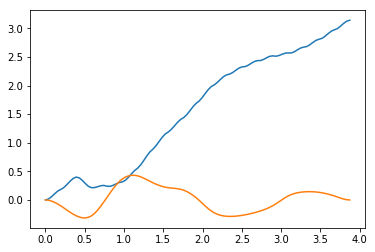

In [14]:
############################################################
# Run this cell to run the code!
############################################################

prog.SetSolverOption(SolverType.kSnopt, 'Print file', "/tmp/snopt.out")
ret = prog.Solve()

x_trajectory = prog.ReconstructStateTrajectory()
breaks = np.linspace(x_trajectory.start_time(),x_trajectory.end_time(),100)
x_knots = np.hstack([x_trajectory.value(t) for t in breaks])

plt.plot(breaks, x_knots[0,:], breaks, x_knots[1,:])

In [ ]:
sum((1, 2, 3))

In [ ]:
net = MLP()
print([param.data.size() for param in list(net.parameters())])
# print(list(net.parameters()))
print(net)

In [ ]:
x = list(range(3))
print([('a' if elem < 2 else -1) for elem in x])